In [3]:
import pandas as pd
import numpy as np
import pickle

In [9]:
train_region = "SanDiego"
test_region = "Austin"
out_overall = pickle.load(open('../data/input/all_regions.pkl','r'))

train_df = out_overall[train_region]
test_df = out_overall[test_region]
transform = "None"
k=3

In [24]:
out = {}
for appliance in ["hvac","fridge","dr","wm"]:
    out[appliance] = {}
    for month in range(1,13):
        print appliance, month
        out[appliance][month] = []
        for test_home in test_df.index:
            try:
                pred =  pickle.load(open('../data/output/ineq_cross/%s_%s_%s_%s_%d_%d_%d.pkl' %(train_region,
                                                                                           test_region,
                                                                                           transform,
                                                                                           appliance,
                                                                                           month,
                                                                                           test_home,
                                                                                           k),'r'))
                gt = test_df.ix[test_home]['%s_%d' %(appliance, month)]
                error = np.abs(gt-pred)
                percentage_error = error*100/gt
                if percentage_error>100:
                    percentage_error=100
                percentage_accuracy = 100-percentage_error
                out[appliance][month].append(percentage_accuracy)
            except Exception, e:
                pass
                
            


hvac 1
hvac 2
hvac 3
hvac 4
hvac 5
hvac 6
hvac 7
hvac 8
hvac 9
hvac 10
hvac 11
hvac 12
fridge 1
fridge 2
fridge 3
fridge 4
fridge 5
fridge 6
fridge 7
fridge 8
fridge 9
fridge 10
fridge 11
fridge 12
dr 1
dr 2
dr 3
dr 4
dr 5
dr 6
dr 7
dr 8
dr 9
dr 10
dr 11
dr 12
wm 1
wm 2
wm 3
wm 4
wm 5
wm 6
wm 7
wm 8
wm 9
wm 10
wm 11
wm 12


In [56]:
acc = {'Our approach':{},'Regional average':{}}

In [57]:
for appliance in ["hvac","fridge","wm"]:
    acc['Our approach'][appliance] = {}
    for month in range(1,13):
        acc['Our approach'][appliance][month] = pd.Series(out[appliance][month]).mean()

In [62]:
%matplotlib inline

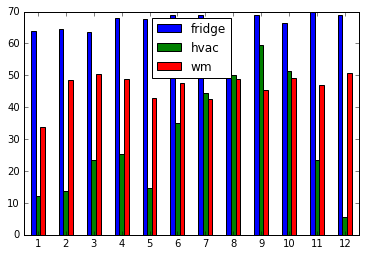

In [65]:
pd.DataFrame(acc['Our approach']).plot(kind='bar',rot=0)

In [66]:
contri = {
    'Austin':
    {'wm':0.01,
    'hvac':0.29,
    'fridge':0.09}
}

In [83]:
for appliance in ["hvac","fridge","wm"]:
    acc['Regional average'][appliance] = {}
    for month in range(1,13):
        acc['Regional average'][appliance][month] = []
        for test_home in test_df.index:
            try:
                pred = test_df.ix[test_home]['aggregate_%d' %month]*contri[test_region][appliance]
                gt = test_df.ix[test_home]['%s_%d' %(appliance, month)]
                error = np.abs(gt-pred)
                percentage_error = error*100/gt
                if percentage_error>100:
                    percentage_error=100
                percentage_accuracy = 100-percentage_error
                acc['Regional average'][appliance][month].append(percentage_accuracy)
            except Exception, e:
                print e
                
        acc['Regional average'][appliance][month] = pd.Series(acc['Regional average'][appliance][month]).mean()

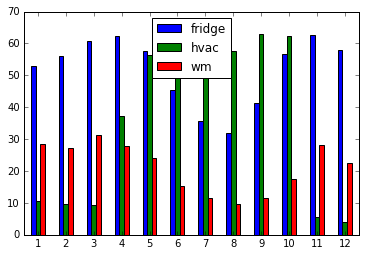

In [84]:
pd.DataFrame(acc['Regional average']).plot(kind='bar',rot=0)

In [70]:
import matplotlib.pyplot as plt

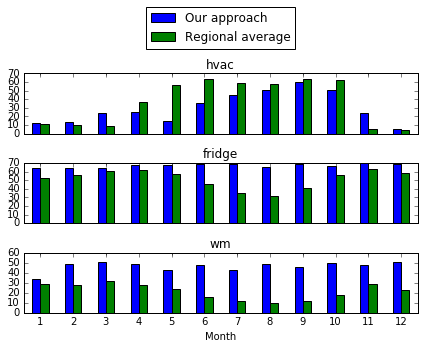

In [119]:
fig, ax = plt.subplots(nrows=3, sharex=True)
for i, appliance in enumerate(["hvac","fridge","wm"]):
    ap_dict = {approach:acc[approach][appliance] for approach in acc.keys()}
    df = pd.DataFrame(ap_dict)
    df.plot(ax=ax[i], kind='bar', title=appliance, rot= 0, legend=False)
plt.tight_layout()
lgd=ax[0].legend(bbox_to_anchor=(0.5,2.2), loc='upper center', ncol=1)
plt.xlabel("Month")
#

plt.savefig('../results/no_transform_sd_austin.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [73]:
ap_dict

{'Our approach': {1: 33.8734504582082,
  2: 48.67136857405774,
  3: 50.31158734130758,
  4: 48.937788635189555,
  5: 42.91586645201225,
  6: 47.54102296541092,
  7: 42.690949812235495,
  8: 48.85646634271478,
  9: 45.31713598166896,
  10: 49.332064873332705,
  11: 47.12320106158118,
  12: 50.861510015694236},
 'Regional average': {1: 33.8734504582082,
  2: 48.67136857405774,
  3: 50.31158734130758,
  4: 48.937788635189555,
  5: 42.91586645201225,
  6: 47.54102296541092,
  7: 42.690949812235495,
  8: 48.85646634271478,
  9: 45.31713598166896,
  10: 49.332064873332705,
  11: 47.12320106158118,
  12: 50.861510015694236}}

In [77]:
acc['Regional average']

{'fridge': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []},
 'hvac': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []},
 'wm': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []}}

In [129]:
train_df['hvac_9'].mean()

218.4750300575705

In [128]:
test_df['hvac_9'].mean()

482.0247721723813